Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Check Point 1:

####  1.Import data sets and Load data set:

#### 2. Make the data proper to make use of data for analysis:

In [4]:
#--- Function to read csv according to delimiter
def load_csv_data(csv_path):
    data = pd.read_csv(csv_path, sep='"*;"*', engine="python", header=0)
    data.columns = data.columns.str.replace('"', '')
    data["age"] = data["age"].str.replace('"','')
    data["y"] = data["y"].str.replace('"','')
    data["job"] = data["job"].str.replace('.','')
    return data

In [5]:
#--- Function to change datatype of columns
def change_datatype(df):
    df['age'] = df['age'].apply(pd.to_numeric)
    return df

In [28]:
# Loading the CSV
df = load_csv_data('bank.csv')

In [29]:
df.shape

(4521, 17)

In [30]:
# a)Identifying the Feature data types. 
print(df.dtypes)

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [31]:
# b)Observed that the data type of age is object, but it should be numeric, so changing it accordingly.
df = change_datatype(df)
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [32]:
# c)Checking for any missing values, found none.
print(df.isnull().values.any())

False


In [33]:
# d)Identifying duplicate data, found none.
print(df.duplicated().values.any())

False


In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Check Point 2:

### 3. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization

The average balance of subscribed customers is 1571.96
The average balance of non-subscribed customers is 1403.21


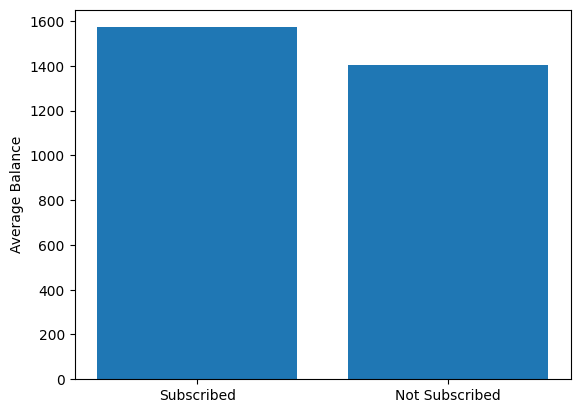

In [59]:
avg_balance_subscribed = df[df['y'] == 'yes']['balance'].mean()
avg_balance_not_subscribed = df[df['y'] == 'no']['balance'].mean()
print("The average balance of subscribed customers is", round(avg_balance_subscribed, 2))
print("The average balance of non-subscribed customers is", round(avg_balance_not_subscribed, 2))

# Visualization
plt.bar(['Subscribed', 'Not Subscribed'], [avg_balance_subscribed, avg_balance_not_subscribed])
plt.ylabel('Average Balance')
plt.show()

### 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

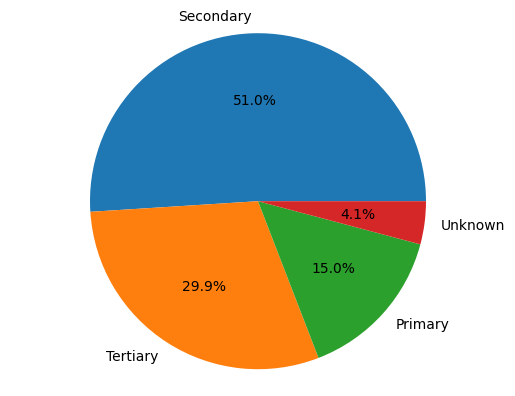

In [65]:
education_distribution = df['education'].value_counts()
plt.pie(education_distribution, labels=list(map(str.title, education_distribution.index)), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### 5.Create a function that should be able to create a new feature(Variable) called season using the month column.

In [52]:
def get_season(month):
    season_mapping = {
        'jan': 'Winter',
        'feb': 'Spring',
        'mar': 'Spring',
        'apr': 'Summer',
        'may': 'Summer',
        'jun': 'Summer',
        'jul': 'Monsoon',
        'aug': 'Monsoon',
        'sep': 'Monsoon',
        'oct': 'Autumn',
        'nov': 'Autumn',
        'dec': 'Winter'
    }
    return season_mapping.get(month.lower(), 'Unknown')

df['season'] = df['month'].apply(get_season)

season
Summer     2222
Monsoon    1391
Autumn      469
Spring      271
Winter      168
Name: count, dtype: int64

### 6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution

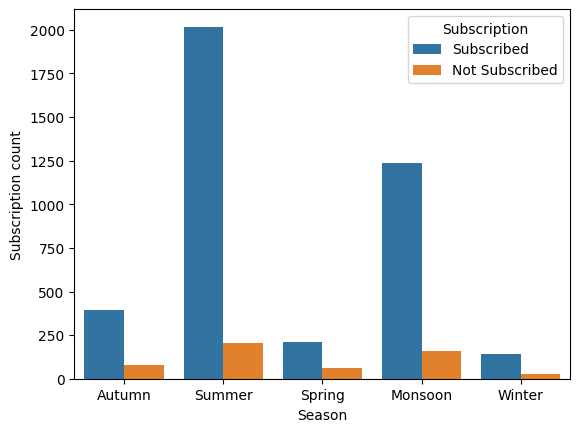

In [62]:
chart = sns.countplot(x='season', hue='y', data=df)
chart.set_xlabel('Season')
chart.set_ylabel('Subscription count')

plt.legend(title='Subscription', labels=['Subscribed', 'Not Subscribed'])
plt.show(chart)

### 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

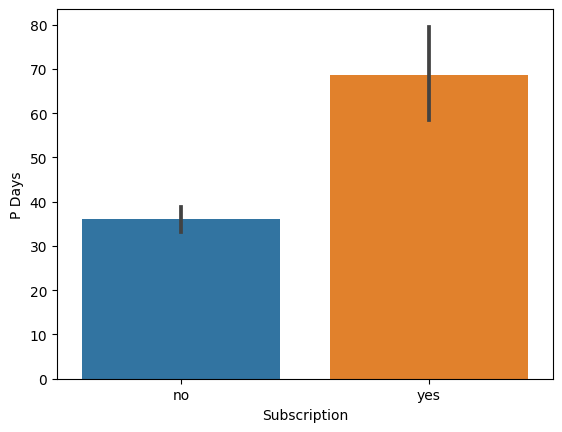

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64


In [68]:
chart = sns.barplot(
    x='y',
    y='pdays',
    data = df
)
chart.set_xlabel('Subscription')
chart.set_ylabel('P Days')

plt.show(chart)

The subscription is affected by the Pdays feature. The customers that are subscribed would appear to have a greater average Pdays feature than the unsubscribed customers.

In [70]:
print(df['pdays'].value_counts())

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64


### 8. Replace the -1 as nan values for the P-days store.

In [15]:
df['pdays'].replace(-1, np.nan, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no


### 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9

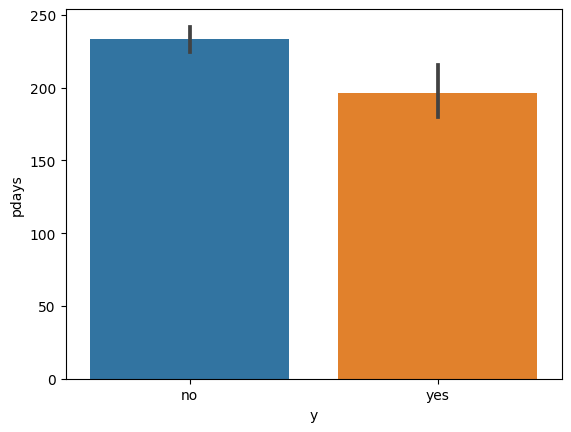

In [17]:
chart = sns.barplot(
    x='y',
    y='pdays',
    data = df
)
chart.set_xlabel('Subscription')
chart.set_ylabel('P Days')

plt.show(chart)

After making the change, it would appear that the unsubscribed customers have a greater average Pdays feature than the subscribed customers, which was totally different from before.

Clearly, the frequency of -1 before replacement was 3705 out of 4521 and greatly negatively contributed to the average Pdays feature. Now, after replacing all the -1s, the unsubscribed customers' average is no longer negatively impacted and the change shows.

### 10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question


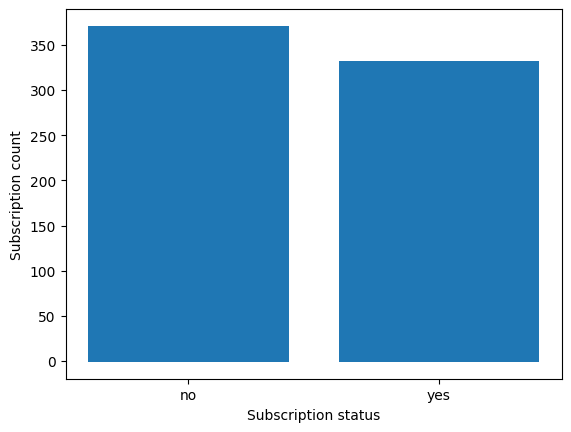

In [72]:
cust_neg_bal = df[df.balance < 0]
plt.bar(cust_neg_bal['y'], cust_neg_bal['pdays'])
plt.ylabel('Subscription count')
plt.xlabel('Subscription status')
plt.show()

Customers that have less than 0 balance have clearly taken subscriptions. In fact, about 325 customers have done so and about 360 have not.

### 11. Use Pivot table to find the maximum balance for each type of job

In [20]:
max_balance = df.groupby('job')['balance'].max()
max_balance

job
admin            22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337
Name: balance, dtype: int64

### 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed

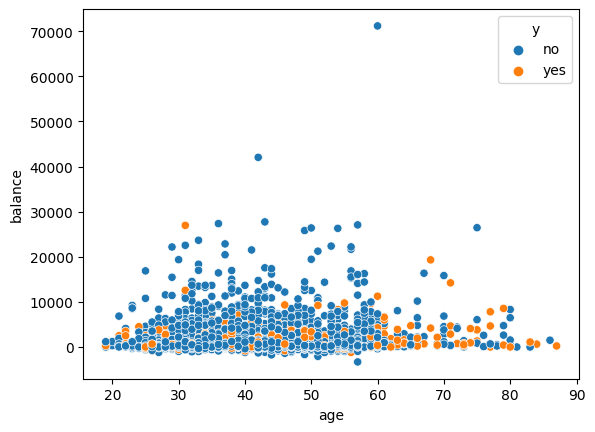

In [23]:
sns.scatterplot(x='age', y='balance', hue='y', data=df)
plt.show()


### 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one

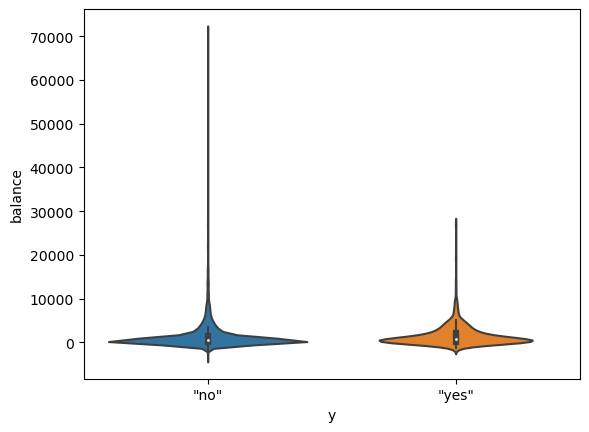

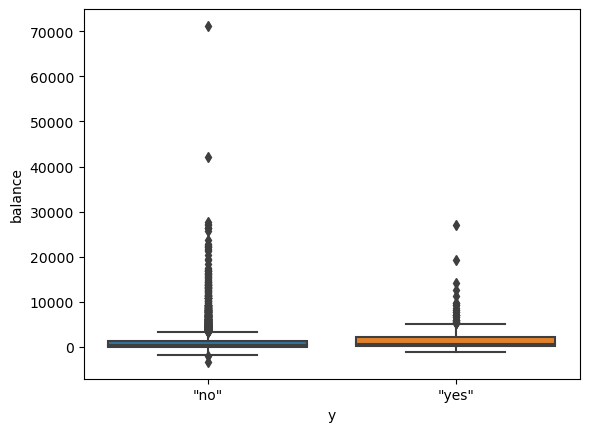

In [31]:
## Using Violin plot
sns.violinplot(x='y', y='balance', data=data)
plt.show()

## Using Box plot
sns.boxplot(x='y', y='balance', data=data)
plt.show()


Both a violin plot and a blot plot are used as both plots show us different viewpoints of the data. Boxplots can define data to people in an easy way. A violin plot is more informative than a plain box plot as it also gives the kernel density as well. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

### 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.


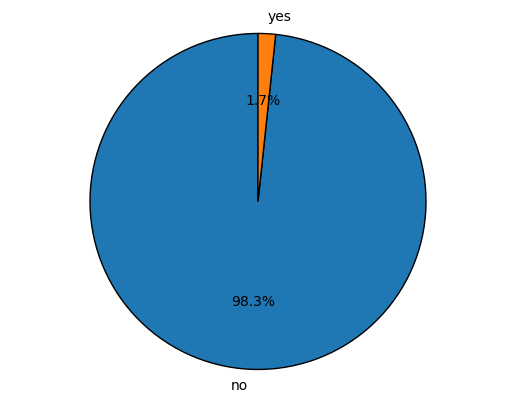

In [56]:
default_distribution = df['default'].value_counts()
plt.pie(default_distribution, labels=default_distribution.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.show()


### 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

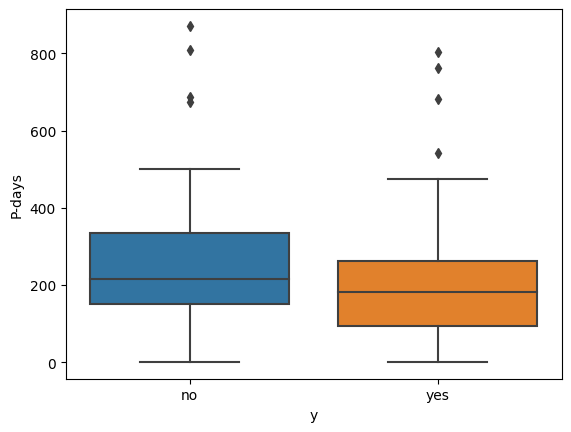

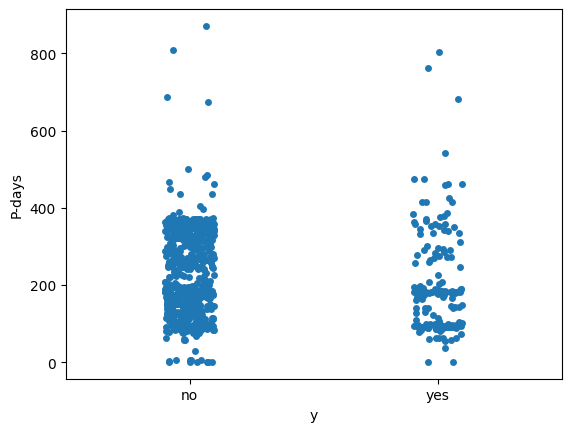

In [25]:
# Visualization - Boxplot
sns.boxplot(x='y', y='pdays', data=df)
plt.ylabel('P-days')
plt.show()

# Visualization - Stripplot
sns.stripplot(x='y', y='pdays', data=df, jitter=True)
plt.ylabel('P-days')
plt.show()

The scatter plot shows more detail. However, comparisons are usually easier to see with the box plot, particularly as the number of data points and groups become larger.